In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import os
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [ ]:
# train_dataset_path = '/content/drive/MyDrive/DATASET A/Train'
# test_dataset_path = '/content/drive/MyDrive/DATASET A/Test'
train_dataset_path = '/content/drive/MyDrive/Dataset A2/Train'
test_dataset_path = '/content/drive/MyDrive/Dataset A2/Test'

In [ ]:
input_shape = (256,256, 3)
batch_size = 32
epochs = 100
num_folds = 5

In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

In [ ]:
healthy_images, healthy_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Healthy MT'), label=0)
lesion_images, lesion_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Lesion MT'), label=1)

images = healthy_images + lesion_images
labels = healthy_labels + lesion_labels

images = np.array(images)
labels = np.array(labels)

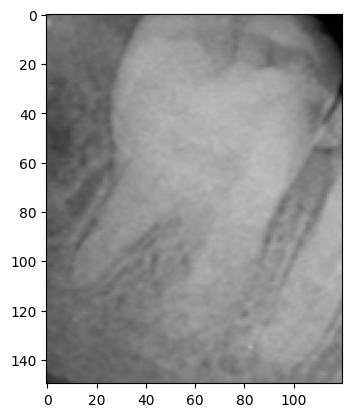

In [ ]:
plt.imshow(images[0])
plt.show()

In [ ]:
# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# To store accuracy of each fold
fold_accuracies1 = []

In [ ]:
def create_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        # GlobalAveragePooling2D(),
        GlobalMaxPooling2D(),
        BatchNormalization(),
        # # Flatten(),
        Dense(1024, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def augment_data(image):
    # if random.random() > 0.5:
    image = np.fliplr(image)
    return image

Training on Fold 1/5
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7104 - loss: 0.6303 - val_accuracy: 0.7273 - val_loss: 1.7189
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9531 - loss: 0.1485 - val_accuracy: 0.7955 - val_loss: 0.6126
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9635 - loss: 0.0917 - val_accuracy: 0.8182 - val_loss: 1.0782
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9912 - loss: 0.0590 - val_accuracy: 0.7955 - val_loss: 1.3363
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9820 - loss: 0.0368 - val_accuracy: 0.7955 - val_loss: 1.1876
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9845 - loss: 0.1324 - val_accuracy: 0.8182 - val_loss: 0.9804
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9963 - loss: 0.0129 - val_accuracy: 0.8409 - val_loss: 0.8600
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8409

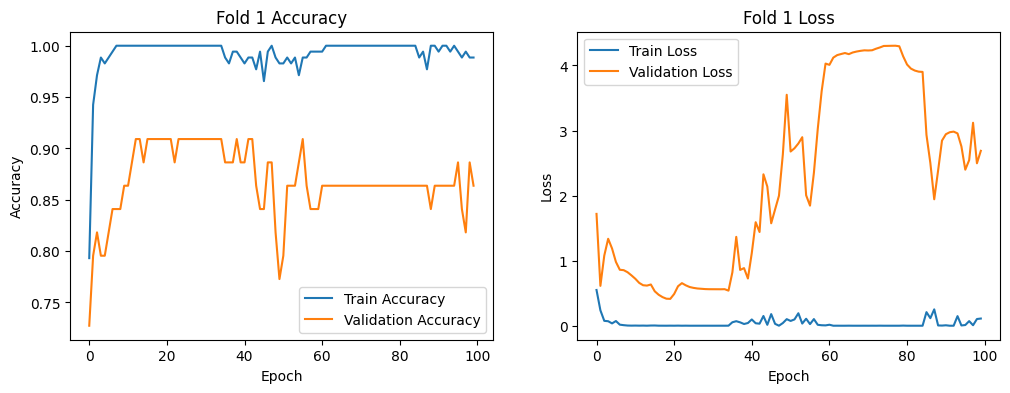

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.8778 - loss: 2.6670
Fold 1 - Validation Accuracy: 0.8636363744735718
Training on Fold 2/5
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7330 - loss: 0.5849 - val_accuracy: 0.3864 - val_loss: 6.3285
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9459 - loss: 0.1347 - val_accuracy: 0.5682 - val_loss: 4.0860
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9540 - loss: 0.0994 - val_accuracy: 0.7500 - val_loss: 2.1638
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.7727 - val_loss: 2.3593
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.7045 - val_loss: 2.9595
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.7727 - val_loss: 2.7885
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8182 - va

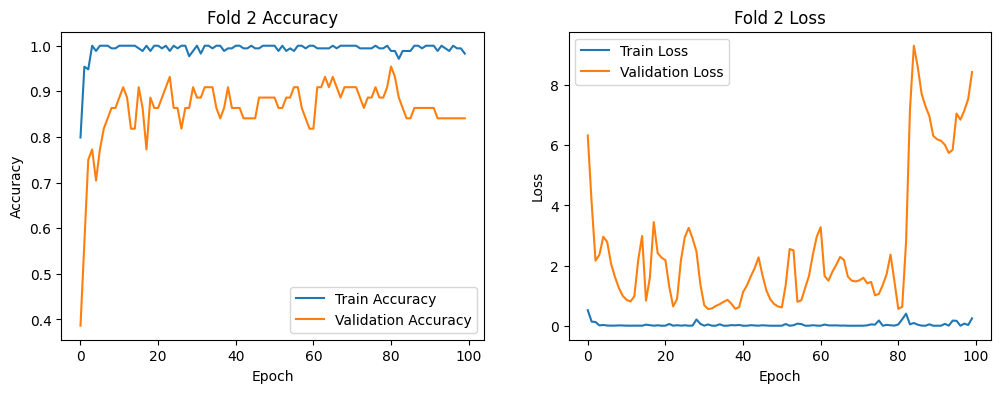

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - accuracy: 0.8523 - loss: 9.0661
Fold 2 - Validation Accuracy: 0.8409090638160706
Training on Fold 3/5
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7049 - loss: 0.6268 - val_accuracy: 0.6591 - val_loss: 1.4281
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9742 - loss: 0.1122 - val_accuracy: 0.8409 - val_loss: 0.5357
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9762 - loss: 0.0560 - val_accuracy: 0.8409 - val_loss: 0.6704
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9926 - loss: 0.0189 - val_accuracy: 0.8409 - val_loss: 0.5725
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.7955 - val_loss: 1.1656
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9727 - loss: 0.1380 - val_accuracy: 1.0000 - val_loss: 0.0158
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9896 - loss: 0.0206 - val_accuracy: 1.0000 - val

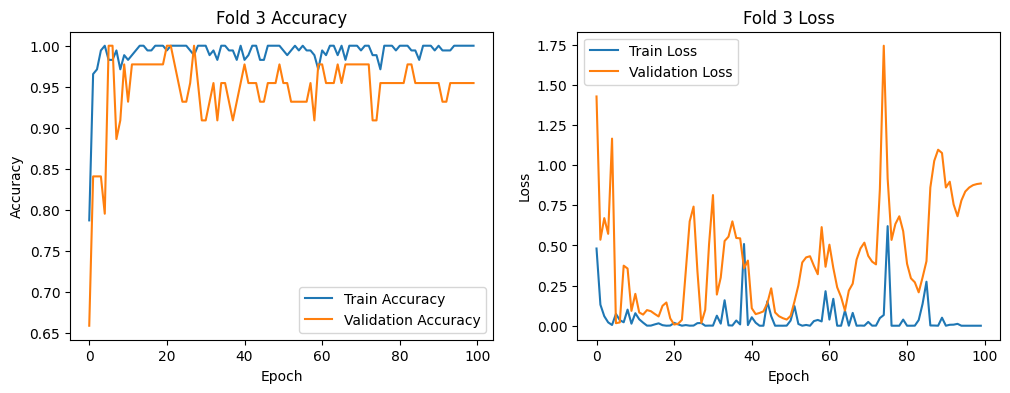

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.9593 - loss: 0.8422
Fold 3 - Validation Accuracy: 0.9545454382896423
Training on Fold 4/5
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6932 - loss: 0.5408 - val_accuracy: 0.5349 - val_loss: 2.1238
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9876 - loss: 0.0539 - val_accuracy: 0.8837 - val_loss: 0.2976
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9975 - loss: 0.0171 - val_accuracy: 0.9302 - val_loss: 0.1347
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9608 - loss: 0.1257 - val_accuracy: 0.9302 - val_loss: 0.2293
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9765 - loss: 0.0568 - val_accuracy: 0.8372 - val_loss: 0.4151
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9507 - loss: 0.0897 - val_accuracy: 0.9302 - val_loss: 0.4234
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9916 - loss: 0.0178 - val_accuracy: 0.9535 - va

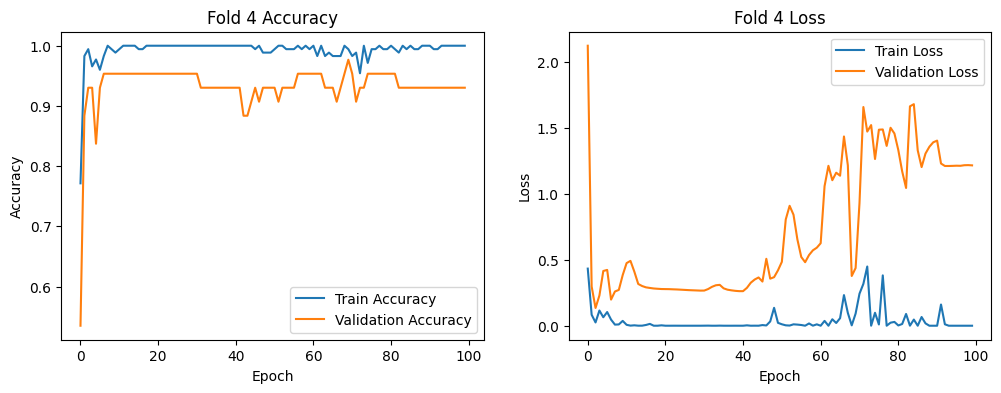

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 698ms/step - accuracy: 0.9327 - loss: 1.2228
Fold 4 - Validation Accuracy: 0.930232584476471
Training on Fold 5/5
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6806 - loss: 0.6670 - val_accuracy: 0.5116 - val_loss: 2.1758
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9373 - loss: 0.1069 - val_accuracy: 0.6512 - val_loss: 1.3928
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9901 - loss: 0.0403 - val_accuracy: 0.6047 - val_loss: 2.5066
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9859 - loss: 0.0474 - val_accuracy: 0.6977 - val_loss: 1.4222
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9829 - loss: 0.0449 - val_accuracy: 0.7442 - val_loss: 1.0462
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9926 - loss: 0.0249 - val_accuracy: 0.7907 - val_loss: 1.0518
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9927 - loss: 0.0176 - val_accuracy: 0.8372 - va

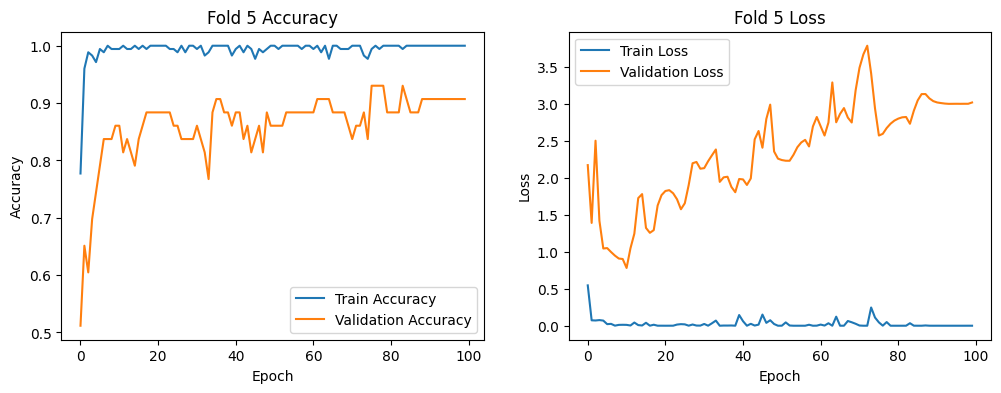

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 679ms/step - accuracy: 0.9172 - loss: 2.1757
Fold 5 - Validation Accuracy: 0.9069767594337463


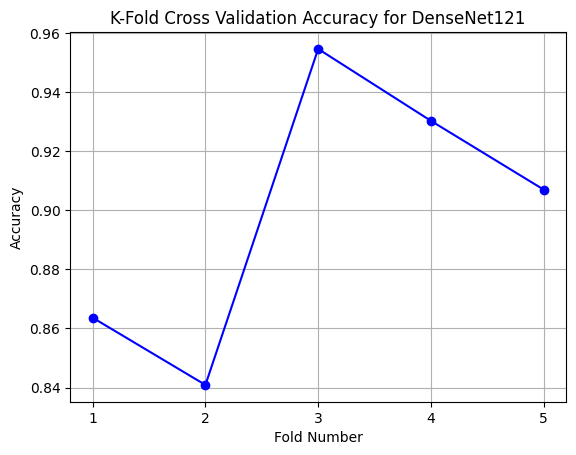


Average Validation Accuracy across 5 folds: 0.8992600440979004


In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(images)):
    print(f"Training on Fold {fold + 1}/{num_folds}")

    # Split data into train and validation sets
    train_images, val_images = images[train_idx], images[val_idx]
    train_labels, val_labels = labels[train_idx], labels[val_idx]

    # Augment training images
    augmented_train_images = np.array([augment_data(img) for img in train_images])
    val_images = np.array(val_images)

    # Create a new model for this fold
    model = create_model()

    # Train the model
    history = model.fit(
        augmented_train_images,
        train_labels,
        validation_data=(val_images, val_labels),
        epochs=epochs,
        batch_size=batch_size
    )

    # Plot training and validation accuracy/loss for this fold
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold + 1} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold + 1} Loss')
    plt.legend()
    plt.show()

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(val_images, val_labels)
    print(f"Fold {fold + 1} - Validation Accuracy: {val_accuracy}")
    fold_accuracies1.append(val_accuracy)

# Plot cross-validation results
plt.plot(range(1, num_folds + 1), fold_accuracies1, marker='o', linestyle='-', color='b')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation Accuracy for DenseNet121')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)
plt.show()

# Print the average accuracy across all folds
print(f"\nAverage Validation Accuracy across {num_folds} folds: {np.mean(fold_accuracies1)}")

In [ ]:
print(fold_accuracies1)

[0.8636363744735718, 0.8409090638160706, 0.9545454382896423, 0.930232584476471, 0.9069767594337463]


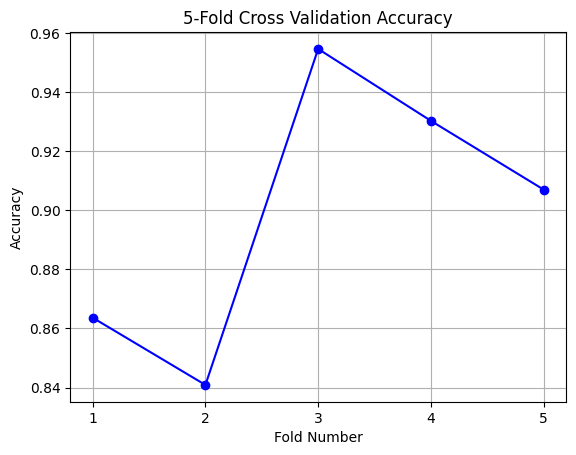

In [ ]:
plt.plot(range(1, 6), fold_accuracies1, marker='o', linestyle='-', color='b')

plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation Accuracy')

plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [ ]:
print(f"\nAverage Validation Accuracy across {num_folds} folds: {np.mean(fold_accuracies1)}")


Average Validation Accuracy across 5 folds: 0.8992600440979004


In [ ]:
test_images = []
test_labels = []

In [ ]:
for class_name in os.listdir(test_dataset_path):
    class_path = os.path.join(test_dataset_path, class_name)
    label = 0 if class_name == "Healthy MT" else 1

    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)

        # Load and preprocess the image
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0  # Normalize the image

        # Original image
        test_images.append(img)
        test_labels.append(label)

        # Horizontally flipped image
        flipped_img = np.fliplr(img)
        test_images.append(flipped_img)
        test_labels.append(label)

# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 0.9132 - loss: 1.4823
Test Accuracy: 0.9166666865348816


In [ ]:
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, predicted_classes))
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes, target_names=["Healthy", "Lesion"]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step

Confusion Matrix:
[[22  2]
 [ 2 22]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.92      0.92      0.92        24
      Lesion       0.92      0.92      0.92        24

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48



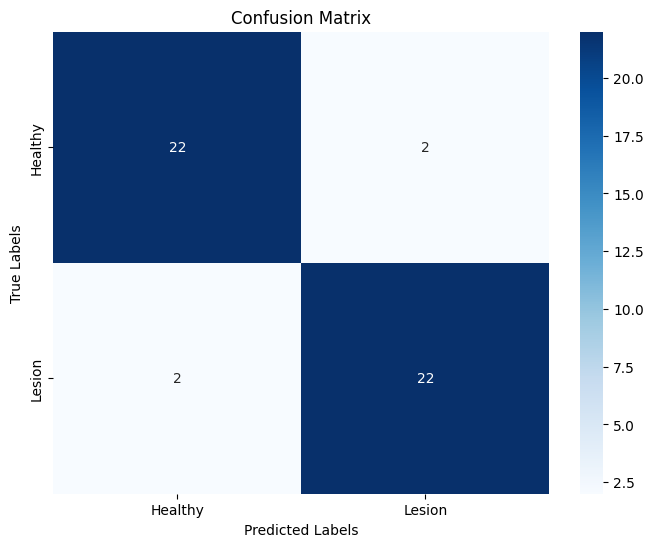

In [ ]:
def plot_confusion_matrix(true_labels, predicted_classes, class_names):
    cm = confusion_matrix(true_labels, predicted_classes)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()


plot_confusion_matrix(test_labels, predicted_classes, class_names=["Healthy", "Lesion"])


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step


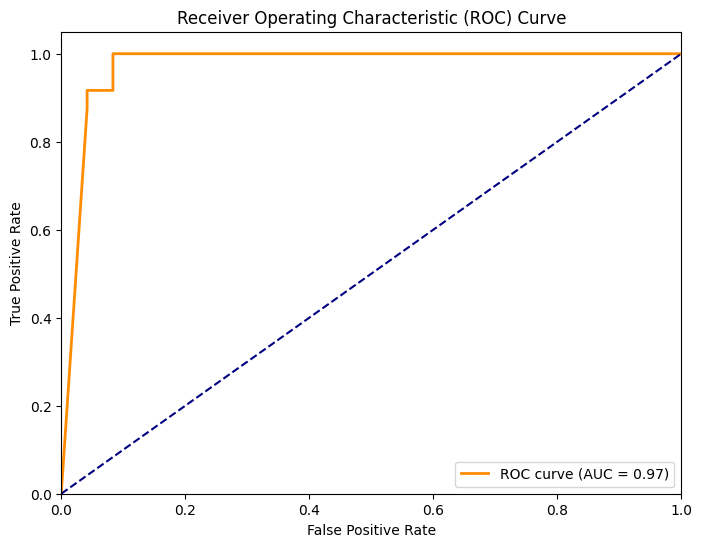

In [ ]:
true_labels = test_labels
predicted_probs = model.predict(test_images)

def plot_roc_curve(true_labels, predicted_probs):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(true_labels, predicted_probs)